# Multiple View Geometry
(source: http://www.robots.ox.ac.uk/~vgg/hzbook/)

## Euclidean geometry

**projective geometry** $\rightarrow$ set line at infinity $\Rightarrow$ **affine geometry** $\rightarrow$ absolute conic $\Rightarrow$ **euclidean geometry**

### Absolute Conic

In **2D**: second degree equation for circle in homogeneous coordinates:

$$(x-aw)^2 + (y-bw)^2 = r^2w^2$$

* algebraically expected for two circles to intersect in $4$ points, however, geometrically the two circles only intersect in $2$ or less points.
* **Solution**: the two circles meet in $2$ *complex* points:

$$(x,y,w)^T = (1, _{-}^{+}i, 0)^T$$

* These complex points are called **cirular points**

In **3D**: instead of looking at circles look at spheres:

* Circles intersect in a sphere and not in a fourth-degree curve as the algebra suggests (and $2$ general ellipsoids do)
* In homogeneous coordinates $(X,Y,Z,T)^T$ all spheres intersect the plane at infinity in a curve with equation:

$$X^2 + Y^2 + Z^2 = 0; \ T=0$$

* This is a second-degree curve (a conic) lying on the plane at infinity and consisting only of complex points: it is known as **absolute conic**

In [73]:
%matplotlib inline
import cmath
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import HTML

input_form = """
<button onclick="toggle_src()">toggle source code</button>
"""

javascript = """
<script type="text/Javascript">
is_hidden = true;
function toggle_src_code() {
        
        var inputs = document.getElementsByClassName('input');
        for(i=0; i<inputs.length; i++) {
            if (is_hidden) {
                inputs[i].style.height = "0";
                inputs[i].style.opacity = "0";
            } else {
                inputs[i].style.height = "auto";
                inputs[i].style.opacity = "1";
            }
        }
    }
    
    setTimeout(toggle_src_code, 100);

    function toggle_src() {
        is_hidden = !is_hidden;
        toggle_src_code();
    }
    
</script>
"""

HTML(input_form + javascript)

(1, 1j, 0) is on cirlce (3, 9) with r=1: True
(1, (-0-1j), 0) is on cirlce (3, 9) with r=1: True


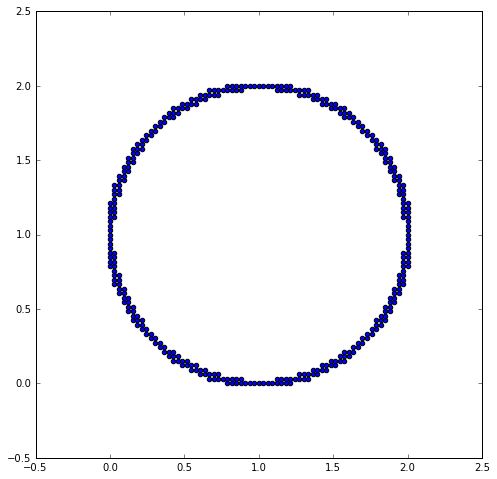

In [2]:
def circle(x, y, center, r, w=1):
    (a, b) = center
    if isinstance(y, complex):
        ac = a + 1j * 0  # make a complex
        bc = b + 1j * 0  # mabe b complex
        wc = w + 1j * 0  # make w complex
        rc = r + 1j * 0  # make r complex
        xc = x + 1j * 0  # make x complex
        return (xc-ac*wc)**2 + (y-bc*wc)**2 == rc**2 * wc**2
    else:
        return math.isclose(
            (x-a*w)**2 + (y-b*w)**2, r**2 * w**2,rel_tol=0.05)

a,b,pos,w,r = 1, 1j, (3,9),0,1
b_ = -1j
    
print(str((a,b,w)) + \
      " is on cirlce " + str(pos) + \
      " with r=" + str(r) + \
      ": " + str(circle(a, b, pos, r, w)))
print(str((a,b_,w)) + \
      " is on cirlce " + str(pos) + \
      " with r=" + str(r) + \
      ": " + str(circle(a, b_, pos, r, w)))
    
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

X = []
Y = []
for x in np.linspace(0, 3, 100):
    for y in np.linspace(0, 3, 100):
        if circle(x, y, (1, 1), 1):
            X.append(x)
            Y.append(y)

ax.scatter(X, Y)
plt.show()

## Camera projection

Most simple projection: $P = \big[ I_{3\times3}|0_3\big]$

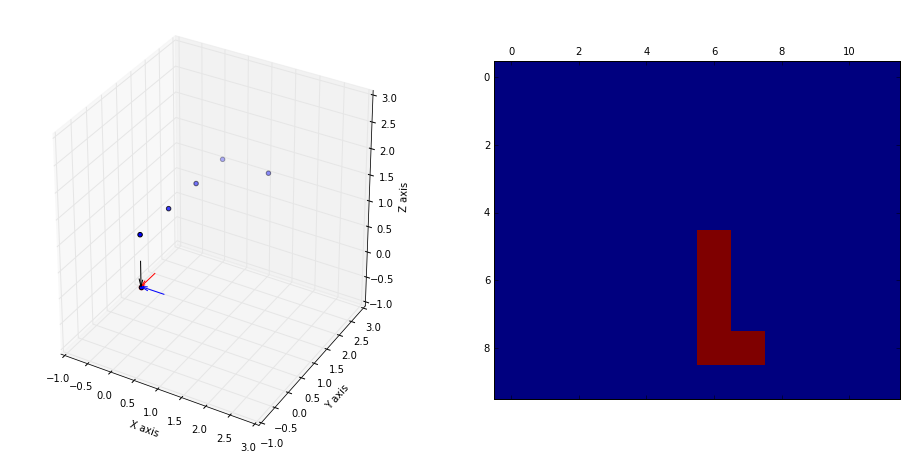

In [3]:
P = np.zeros((3,4))
P[0::1, 0:3] = np.eye(3)

points3d = [
    np.transpose(np.array([[0,0,1,1]])),
    np.transpose(np.array([[0,1,1,1]])),
    np.transpose(np.array([[0,2,1,1]])),
    np.transpose(np.array([[0,3,1,1]])),
    np.transpose(np.array([[1,3,1,1]]))
]

# ===========================
# Draw
# ===========================

def draw_quiver(ax, pos3d, dir3d, color='blue', alpha=1, length=1):
    if not type(pos3d).__module__ == "numpy":
        pos3d = np.array(pos3d)
    if not type(dir3d).__module__ == "numpy":
        dir3d = np.array(dir3d)
    assert(np.isclose(1, np.linalg.norm(dir3d)))
    dir3d = dir3d * (-1)  # need to be done bcs otherwise the arrow goes wrong..
    ax.quiver(
        pos3d[0], pos3d[1], pos3d[2], dir3d[0], \
        dir3d[1], dir3d[2], facecolor='None', \
        length=length, color=color, alpha=alpha)

def plot_cam(ax, pos, R, length=1):
    R = np.transpose(R)
    ax.scatter(pos[0], pos[1], pos[2], color='black')
    draw_quiver(ax, pos, R[:,0], color='blue', length=length)
    draw_quiver(ax, pos, R[:,1], color='red', length=length)
    draw_quiver(ax, pos, R[:,2], color='black', length=length)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')

ax.set_zlim3d(-1, 3)
ax.set_ylim3d(-1, 3)
ax.set_xlim3d(-1, 3)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.scatter(0,0,0, color='red')

w, h = 12, 10
I = np.zeros((h,w))
for point3d in points3d:
    p = P @ point3d
    u = p[0]/p[2]
    v = p[1]/p[2]
    I[int(h/2 + v), int(w/2 + u)] = 1
    
    
Points3d = np.array(points3d)
ax.scatter(Points3d[:,0], Points3d[:,1], Points3d[:,2])

plot_cam(ax, (0, 0, 0), P[0::1, 0:3], length=0.5)

ax = fig.add_subplot(122)
ax.matshow(I)
    
plt.show()

## Projective Geometry and Transformations of 2D

Points in $\mathbf{P}^2$ can be viewed as set of rays in $\mathbf{R}^3$ that pass through the origin. Lines in $\mathbf{P}^2$ can be thought of as planes in $\mathbf{R}^2$ that pass through the origin as well.

* **Intersection of lines**: $l=(a,b,c)^T$ and $l'=(a',b',c')^T$

$$x = l \times l'$$

* **line joining points**: given two points $x$ and $x'$:

$$l= x \times x'$$

* **Intersection of parallel lines**: $l=(a,b,c)^T$ and $l'=(a,b,c')^T$

$$I\times I'=(c'-c)(b,-a,0)^T$$
$$\text{Ignore scale factor} \ \ (c'-c) \ \Rightarrow \ \ (b,-a,0)^T$$

* **Ideal points**: Set of all points in $\mathbf{P}^2$ with $x_3 = 0$ $\ \ \ \Rightarrow \ \ (x_1, x_2, 0)^T$
    * This set lies on a single line at infinity: $l_{\infty}=(0,0,1)^T$
    
### Conics

Curve described by second-degree equation in plane.
* In **Euclidean geometry**: hyperbola, ellipse, parabola
* In inhomogeneous coordinates: (polynomial of degree 2)

$$ax^2 + bxy + cy^2 + dx + ey + f=0$$

* "homogenize" ($x\rightarrow x_1/x_3, \ \ y \rightarrow x_2/x_3$)

$$ax_1^2 + bx_1x_2 + cx_2^2 + dx_1x_3 + ex_2x_3 + fx_3^2 = 0$$

* in matrix form:

$$x^TCx = 0 \\
C = \begin{bmatrix}
a & b/2 & d/2 \\ 
b/2 & c & e/2\\ 
d/2 & e/2 & f
\end{bmatrix}
$$

* The conic has five degrees of freedom: ratios: $\{a:b:c:d:e:f \}$
* Points $x$ who satisfy $x^TCx=0$ lie on a point conic
* Lines $l$ who satisfy $l^TC^*l=0$ are tangent to the point conic $C$

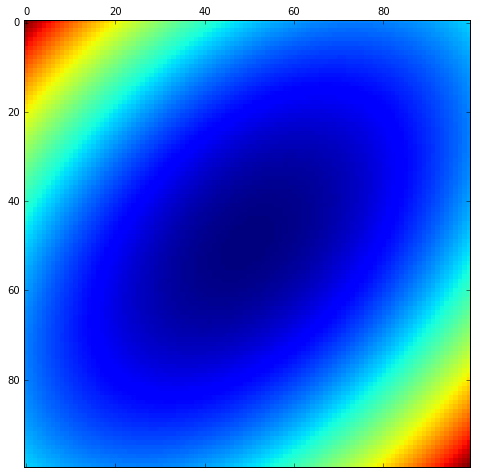

In [28]:
def gen_C(a,b,c,d,e,f):
    return np.array([
            [a, b/2, d/2],
            [b/2, c, e/2],
            [d/2, e/2, f]
        ])

C = gen_C(1, 1, 1, 0, 0, 0)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

W = 100
H = 100
X = np.linspace(-2, 2, W)
Y = np.linspace(-2, 2, H)
I = np.zeros((H,W), np.float32)

for i, x in enumerate(X):
    for j, y in enumerate(Y):
        x_ = np.array([x, y, 1])
        I[j, i] = x_.T @ C @ x_

ax.matshow(I)

plt.show()

### projective transformation

**Definition**: a projective transformation is an invertible mapping $h$ from $\mathbf{P}^2$ to intself such that three points $x_1, x_2$ and $x_3$ lie on the same line iff $h(x_1), h(x_2)$ and $h(x_3)$ do.

**Synonyms**: projectivity, homography

**Theorem**: *a mapping $h:\mathbf{P}^2 \rightarrow \mathbf{P}^2$ is a projectivity iff $\exists$ non-singular $3\times3$ matrix $H$* s.t. for any point in $\mathbf{P}^2$ represented by $x$ it is true that $h(x)=Hx$



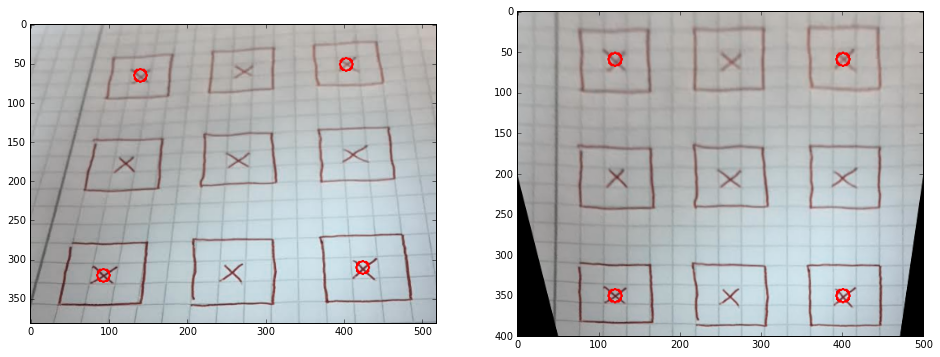

In [107]:
img = cv2.imread('squares.png')

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)

p1 = (140,66)
p2 = (402,52)
p3 = (93,320)
p4 = (423,310)
P = np.array([p1, p2, p3, p4], np.float32)

p1_t = (120, 60)
p2_t = (400, 60)
p3_t = (120, 350)
p4_t = (400, 350)
P_t = np.array([p1_t, p2_t, p3_t, p4_t], np.float32)

M = cv2.getPerspectiveTransform(P, P_t)
img_t = cv2.warpPerspective(img, M, (500,400))

cv2.circle(img, p1, 8, (255,0,0), 2)
cv2.circle(img, p2, 8, (255,0,0), 2)
cv2.circle(img, p3, 8, (255,0,0), 2)
cv2.circle(img, p4, 8, (255,0,0), 2)
ax.imshow(img)

ax = fig.add_subplot(122)
cv2.circle(img_t, p1_t, 8, (255,0,0), 2)
cv2.circle(img_t, p2_t, 8, (255,0,0), 2)
cv2.circle(img_t, p3_t, 8, (255,0,0), 2)
cv2.circle(img_t, p4_t, 8, (255,0,0), 2)
ax.imshow(img_t)

plt.show()